In [1]:
import numpy as np 
import scipy.linalg as spl
from ncon import ncon
from scipy import integrate
import matplotlib.pyplot as plt

In [3]:
def Tensors(d,D):
    Ga = np.random.rand(D,d,D)
#     Ga = Ga / np.max(np.abs(Ga))
    Gb = np.random.rand(D,d,D)
#     Gb = Gb / np.max(np.abs(Gb))
    G = [Ga,Gb]
#     La = np.random.rand(D)
#     La = La / np.linalg.norm(La)
#     Lb = np.random.rand(D)
#     Lb = Lb / np.linalg.norm(Lb)
    La = np.ones(D) / np.sqrt(D)
    Lb = np.ones(D) / np.sqrt(D)
    L = [La,Lb]    
    return G,L

In [4]:
def Hamiltonian(J,h,δ):
    X = np.array([[0,1],[1,0]])
    Z = np.array([[1,0],[0,-1]])
    Id = np.eye(2,2)
    Hz = ncon([Z,Z],[[-1,-3],[-2,-4]])
    Hx = 0.5*(ncon([X,Id],[[-1,-3],[-2,-4]]) + ncon([Id,X],[[-1,-3],[-2,-4]]))
    H = J*Hz + h*Hx
    Hexp = np.reshape(H,[4,4])
    Ug = spl.expm(-δ*Hexp)
    Ug = np.reshape(Ug,[2,2,2,2])
    return H,Ug  

In [8]:
def itebd(J,h,δ,d,D,n_iter):
    H, Ug = Hamiltonian(J,h,δ);
    G,L = Tensors(d,D);
#     tensors = [np.diag(L[B]), G[A], np.diag(L[A]), G[B], np.diag(L[B])]
#     connect = [[-1,1],[1,-2,2],[2,3],[3,-4,4],[4,-3]]
#     order = [1,4,3,2]
#     θ = ncon(tensors, connect, order)
    
    for step in range(n_iter):
        if step % 2 == 0:
            A = 0; B = 1;
        else:
            A = 1; B = 0;
    
        tensors = [np.diag(L[B]), G[A], np.diag(L[A]), G[B], np.diag(L[B]),Ug]
        connect = [[-1,1],[1,2,3],[3,4],[4,5,6],[6,-3],[2,5,-2,-4]]
        order = [1,4,6,3,2,5]
        θ = ncon(tensors, connect, order)
#         if 
        # SVD
        θ = np.reshape(θ,[D*d,D*d])
        U,S,V = np.linalg.svd(θ)
        G[A] = U[:,0:D]
        L[A] = S[0:D]
        L[A] = L[A] / np.trace(np.diag(L[A]))
        G[B] = V[0:D,:]
        G[A] = np.reshape(G[A],[D,d,D])
        G[B] = np.reshape(G[B], [D,d,D])
        G[A] = ncon([np.diag(1./L[B]), G[A]],[[-1,1],[1,-2,-3]])
        G[B] = ncon([G[B], np.diag(1./L[B])], [[-1,-2,1],[1,-3]])
#         G[A] = G[A] / np.max(np.abs(G[A]))
#         G[B] = G[B] / np.max(np.abs(G[B]))

    E = []
    for j in range(len(G)):
        if j % 2 == 0:
            A = 0; B = 1;
        else:
            A = 1; B = 0;
        tensors = [np.diag(L[B]), G[A], np.diag(L[A]), G[B], np.diag(L[B])]
        connect = [[-1,1],[1,-2,2],[2,3],[3,-4,4],[4,-3]]
        order = [1,4,3,2]
        θ = ncon(tensors, connect, order)
        Eb = ncon([θ,H,θ.conj()],[[1,2,3,4],[2,4,5,6],[1,5,3,6]], [5,6,1,2,3,4])
        E.append(Eb)
    E_total = np.sum(E)
    E_0 = E_total / 2.0
#     print("E_total = ", E_total)
#     print("E_0 = ",E_0 )
#     f = lambda k,h : -2*np.sqrt(1+h**2-2*h*np.cos(k))/np.pi/2.
#     E0_exact = integrate.quad(f, 0, np.pi, args=(h,))[0]
#     print("E_exact =", E0_exact)
    return E_0

In [13]:
# itebd(J,h,δ,d,D,n_iter)
itebd(-1,0.2,0.01,2,10,100)

-0.9877239663364232

In [13]:
E = []
x = np.arange(-4,8,0.1)
for j in x:
    e = itebd(-1,-j,0.1,2,5,400)
    E.append(e)

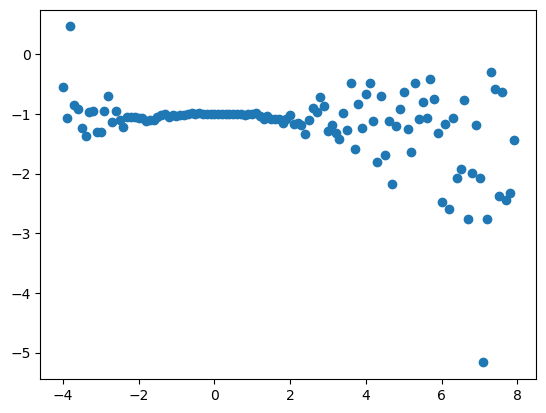

In [14]:
plt.scatter(x,E)
plt.show()

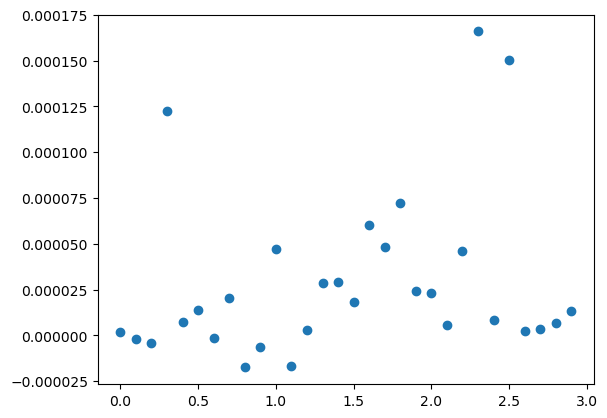